In [18]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

no display found. Using non-interactive Agg backend


In [11]:
#For the 4 Different Countries

def model_SIR(G,iters, beta, gamma, ini):
    """
    iters: int, number of iterations to run
    beta: float [0,1], infection rate
    gamma: float [0,1], recovery rate
    ini: float [0,1], fraction of nodes to infect at start
    return: lists, trends for S,I,R
    """
    g = G
    
    # Model selection
    model = ep.SIRModel(g)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', beta)
    cfg.add_model_parameter('gamma', gamma)
    cfg.add_model_parameter("fraction_infected", ini)
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(iters)
    
    # Extracting data from iterations
    S,I,R = [], [], []
    N = G.number_of_nodes()

    for i in range(len(iterations)):
        S.append(iterations[i]['node_count'][0]/N)
        I.append(iterations[i]['node_count'][1]/N)
        R.append(iterations[i]['node_count'][2]/N)
        
    return S,I,R

In [12]:
G = nx.barabasi_albert_graph(1000,3)
n = G.number_of_nodes()
p = nx.density(G) 
# from info of G

def info(G, return_values=False):
    
    N = G.number_of_nodes()
    L = G.number_of_edges()
    p = nx.density(G)
    status = nx.is_directed(G)

    # Average degree
    total_k = sum(dict(G.degree).values())
    N = int(G.number_of_nodes())
    avg_k = total_k/N
    
    # Shortest Path
    s_path = nx.average_shortest_path_length(G)
    
    # Node Connectivity 
    node_connectivity = nx.approximation.node_connectivity(G)
    
    # Average Clustering
    avg_clustering_coef = nx.approximation.average_clustering(G)
    
    
    # Display Statistics
    print("Nodes =", N)
    print("Edges =", L)
    print("Directed =",status)
    print("Density =",p)
    print("Average degree =",avg_k)
    print("Average Clustering Coefficient =",avg_clustering_coef)
    print("Node Connectivity =", node_connectivity)
    
    nodes = list(G.nodes())
    edges = list(G.edges())
    
    # Plotting degree Distribution
    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))
    plt.figure(figsize=(6, 4)) 
    plt.loglog(degrees, degree_freq,'o') 
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title("Degree Distribution (log-log)")
    plt.show()
    
    # Clustering
    C = nx.clustering(G)
    c = np.asarray(list(C.values())) #Convert dict to list to array
    plt.hist(c, bins=10, range=[0, 1])
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Nodes')
    plt.title("Clustering")
    plt.show()
    
    
    if return_values == True:
        return avg_k, p, N, L, nodes, edges
    else:
        return

In [13]:
G = nx.barabasi_albert_graph(1000,3)
n = G.number_of_nodes()
p = nx.density(G) 

Nodes = 1000
Edges = 2991
Directed = False
Density = 0.005987987987987988
Average degree = 5.982
Average Clustering Coefficient = 0.038
Node Connectivity = 3


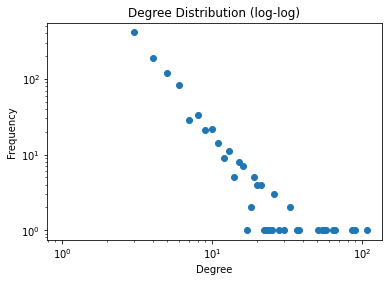

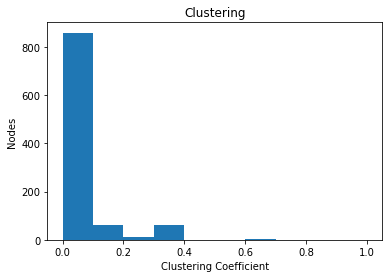

In [14]:
#Graphical Representation
pos_BA = nx.spring_layout(G, scale=2)
info(G)
plt.show()

In [15]:
#China and South Korea
def SIR(G,title):
   #Giving value of a and b for both China and South Korea
    Beta_range = [0.350, 0.400]
    Gamma_range = [0.035, 0.035]

    fig, ax = plt.subplots(len(Beta_range), len(Gamma_range)) 
    fig.set_size_inches(3*len(Beta_range),3*len(Gamma_range))
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    fig.suptitle(title+'\nSIR at various Infection Rate \u03B2 and Recovery Rate \u03B3',size=16, y=1)
    fig.supylabel('<-------------- Infection Rate --------------->', x = 0.05)
    fig.supxlabel('<-------------- Recovery Rate --------------->', y= 0.05)

    for i in range(0,len(Beta_range)):
        for j in range(0,len(Gamma_range)):
            S,I,R = model_SIR(G, iters=200, beta=Beta_range[i], gamma=Gamma_range[j], ini=0.2)
            ax[i][j].axis("off")
            ax[i][j].plot(S, 'b:', label=f"S", )
            ax[i][j].plot(I, 'r:', label=f"I")
            ax[i][j].plot(R, 'g:', label=f"R")

            ax[i][j].title.set_text(f"\u03B2 {Beta_range[i]}   \u03B3 {Gamma_range[j]}")
            ax[i][j].legend(loc=7)

    plt.show()

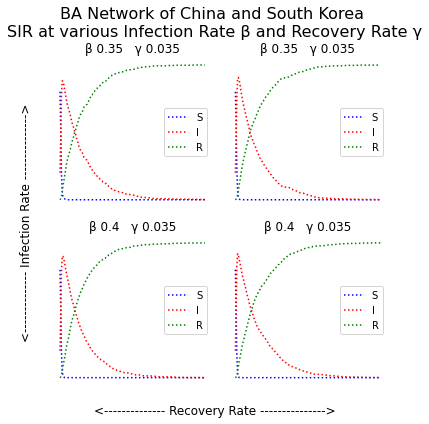

In [7]:
SIR(G, "BA Network of China and South Korea ")

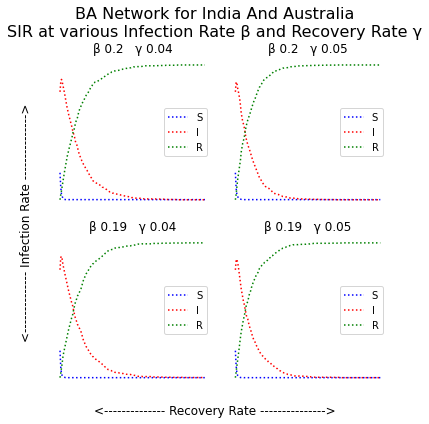

In [16]:
#India and Australia
def SIR(G,title):
    Beta_range = [0.200, 0.190]
    Gamma_range = [0.040, 0.050]

    fig, ax = plt.subplots(len(Beta_range), len(Gamma_range)) 
    fig.set_size_inches(3*len(Beta_range),3*len(Gamma_range))
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    fig.suptitle(title+'\nSIR at various Infection Rate \u03B2 and Recovery Rate \u03B3',size=16, y=1)
    fig.supylabel('<-------------- Infection Rate --------------->', x = 0.05)
    fig.supxlabel('<-------------- Recovery Rate --------------->', y= 0.05)

    for i in range(0,len(Beta_range)):
        for j in range(0,len(Gamma_range)):
            S,I,R = model_SIR(G, iters=200, beta=Beta_range[i], gamma=Gamma_range[j], ini=0.8)
            ax[i][j].axis("off")
            ax[i][j].plot(S, 'b:', label=f"S", )
            ax[i][j].plot(I, 'r:', label=f"I")
            ax[i][j].plot(R, 'g:', label=f"R")

            ax[i][j].title.set_text(f"\u03B2 {Beta_range[i]}   \u03B3 {Gamma_range[j]}")
            ax[i][j].legend(loc=7)

    plt.show()
SIR(G, "BA Network for India And Australia")

In [27]:
#1) CHINA SIR model with Scale Free network type

# Network topology
ChinaGraph = nx.barabasi_albert_graph(1000,3)
print(ChinaGraph.number_of_nodes())

# View Nodes with maximum Degree
VacDegree=ChinaGraph.degree() 
ChinaNodes=sorted(VacDegree,key=lambda x:x[1],reverse=True)
print(ChinaNodes)

# Model selection
model = ep.SIRModel(ChinaGraph)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.350)
cfg.add_model_parameter('gamma', 0.035)
cfg.add_model_parameter("fraction_infected", 0.2)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(6)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
viz.plot('ChinaGraph.jpeg')


1000
[(0, 106), (7, 78), (1, 67), (5, 59), (10, 53), (2, 48), (8, 41), (4, 40), (9, 38), (6, 36), (3, 35), (21, 32), (39, 30), (61, 29), (12, 27), (25, 27), (27, 27), (31, 26), (51, 26), (17, 25), (22, 25), (37, 25), (188, 25), (11, 24), (30, 24), (68, 24), (13, 23), (34, 23), (35, 23), (46, 23), (50, 23), (93, 23), (28, 22), (36, 21), (23, 20), (43, 20), (59, 20), (76, 20), (26, 19), (89, 19), (139, 19), (60, 17), (80, 17), (114, 17), (20, 16), (44, 16), (54, 16), (62, 16), (70, 16), (77, 16), (83, 16), (42, 15), (58, 15), (149, 15), (154, 15), (160, 15), (38, 14), (57, 14), (129, 14), (130, 14), (145, 14), (19, 13), (33, 13), (84, 13), (113, 13), (125, 13), (226, 13), (227, 13), (289, 13), (15, 12), (24, 12), (53, 12), (66, 12), (109, 12), (111, 12), (120, 12), (137, 12), (141, 12), (40, 11), (41, 11), (79, 11), (82, 11), (119, 11), (136, 11), (151, 11), (155, 11), (176, 11), (180, 11), (209, 11), (428, 11), (14, 10), (18, 10), (32, 10), (45, 10), (56, 10), (64, 10), (85, 10), (90, 1

<Figure size 1440x720 with 0 Axes>

In [28]:
#Saving Original nodes and edges
original_edges = nx.number_of_edges(ChinaGraph)
original_nodes = nx.number_of_nodes(ChinaGraph)

neighbours_china = set()
removed_chinanodes = set()

In [29]:
# Removing 40% node (HIGH TO LOW)
Original40China = ChinaGraph.copy()

VacDegree= Original40China.degree() 

ChinaNodes=sorted(VacDegree,key=lambda x:x[1],reverse=True)

# Removal of 40% of the nodes with high degree
for i in range(int(0.4*Original40China.number_of_nodes())):
    a= ChinaNodes[i][0]
    for s in Original40China.neighbors(a):
        neighbours_china.add(s)
    removed_chinanodes.add(a)
    Original40China.remove_node(a)

In [30]:
# Model selection after removing 40%
model = ep.SIRModel(Original40China)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.350)
cfg.add_model_parameter('gamma', 0.035)
cfg.add_model_parameter("fraction_infected", 0.2)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(6)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
viz.plot('ChinaGraph40Removal.jpeg')

#View Changes
print(Original40China)


Graph with 600 nodes and 195 edges


<Figure size 1440x720 with 0 Axes>

C:\Users\mm5248\AppData\Local\Temp/ipykernel_14436/3760342168.py:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


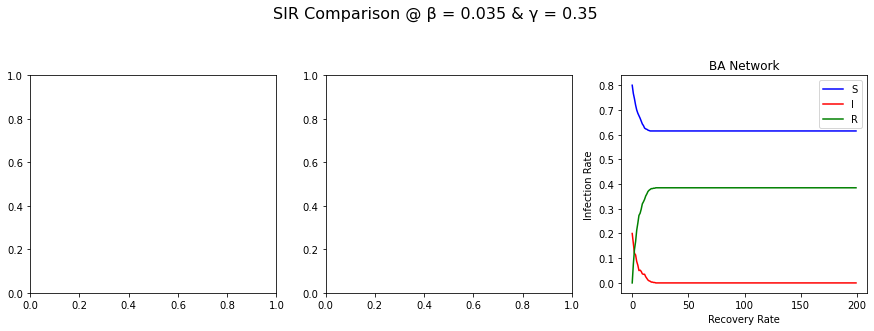

In [50]:
beta = 0.035
gamma=0.350

# Generating Trends for each BA Network for 40% of removal in graph
S_BA,I_BA,R_BA = model_SIR(Original40China, iters=200, beta=beta, gamma=gamma, ini=0.2)

# Making Subplots
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,4)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Plotting Recovery Comparison
ax[2].plot(S_BA,'b',label="S")
ax[2].plot(I_BA,'r',label="I")
ax[2].plot(R_BA,'g',label="R")
ax[2].title.set_text("BA Network")
ax[2].legend()

# Main Title
fig.suptitle(f"SIR Comparison @ \u03B2 = {beta} & \u03B3 = {gamma}",size=16, y=1.12)

plt.xlabel('Recovery Rate')
plt.ylabel('Infection Rate')
plt.show()

In [ ]:

# Network topology
ChinaGraph = nx.barabasi_albert_graph(1000,3)
print(ChinaGraph.number_of_nodes())

import random

def initial_state(ChinaGraph):
    state = {}
    for node in ChinaGraph.nodes:
        state[node] = 'S'
    
    patient_zero = random.choice(list(ChinaGraph.nodes))
    state[patient_zero] = 'I'
    return state
    
    Patient_recovered = random.choice(list(ChinaGraph.nodes))
    state[patient_recover] = 'R'
    return state

initial_state(ChinaGraph)

In [ ]:
GAMMA = 0.035
BETA = 0.350 

def state_transition(ChinaGraph, current_state):
    next_state = {}
    for node in ChinaGraph.nodes:
        if current_state[node] == 'S':
            if random.random() < BETA:
                next_state[node] = 'I'
        else: # current_state[node] == 'S'
            for neighbor in ChinaGraph.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() > GAMMA:
                        next_state[node] = 'R'

    return next_state

In [ ]:
test_state = initial_state(ChinaGraph)
state_transition(ChinaGraph, test_state)


In [36]:
# Removing 50 % node (HIGH TO LOW)
Original50China = ChinaGraph.copy()
VacDegree= Original50China.degree() 

ChinaNodes=sorted(VacDegree,key=lambda x:x[1],reverse=True)

# Removal of 50% of the nodes with high degree
for i in range(int(0.5*Original50China.number_of_nodes())):
    a= ChinaNodes[i][0]
    for s in Original50China.neighbors(a):
        neighbours_china.add(s)
    removed_chinanodes.add(a)
    Original50China.remove_node(a)

In [37]:
# Model selection
model = ep.SIRModel(Original50China)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.350)
cfg.add_model_parameter('gamma', 0.035)
cfg.add_model_parameter("fraction_infected", 0.2)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(6)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
viz.plot('ChinaGraph50Removal.jpeg')

#View Changes
print(Original50China)


Graph with 500 nodes and 111 edges


<Figure size 1440x720 with 0 Axes>

C:\Users\mm5248\AppData\Local\Temp/ipykernel_14436/2977188213.py:26: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


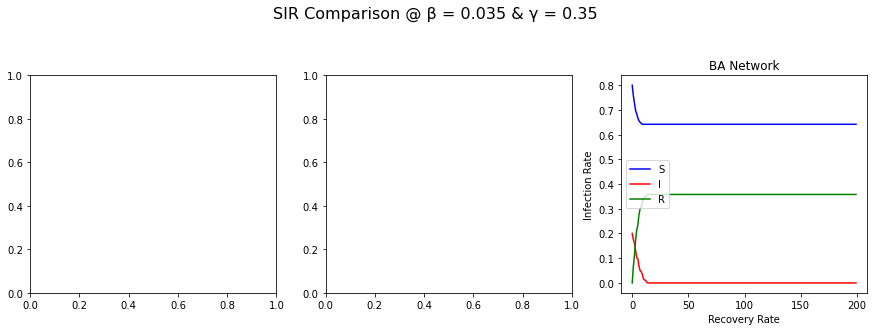

In [51]:
#Display BA GRaph after 50% removal

beta = 0.035
gamma=0.350

# Generating Trends for each BA Network after 50% cut down of nodes
S_BA,I_BA,R_BA = model_SIR(Original50China, iters=200, beta=beta, gamma=gamma, ini=0.2)

# Making Subplots
fig, ax = plt.subplots(1,3) 
fig.set_size_inches(15,4)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Plotting Recovery Comparison
ax[2].plot(S_BA,'b',label="S")
ax[2].plot(I_BA,'r',label="I")
ax[2].plot(R_BA,'g',label="R")
ax[2].title.set_text("BA Network")
ax[2].legend()

# Main Title
fig.suptitle(f"SIR Comparison @ \u03B2 = {beta} & \u03B3 = {gamma}",size=16, y=1.12)

plt.xlabel('Recovery Rate')
plt.ylabel('Infection Rate')
plt.show()

C:\Users\mm5248\AppData\Local\Temp/ipykernel_14436/1377583573.py:26: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


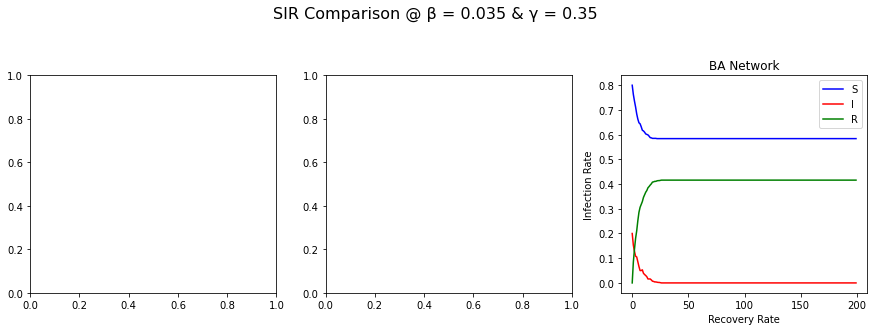

In [52]:
# Original Graph

beta = 0.035
gamma=0.350

# Generating Trends for each BA Network for original graph
S_BA,I_BA,R_BA = model_SIR(ChinaGraph, iters=200, beta=beta, gamma=gamma, ini=0.2)

# Making Subplots
fig, ax = plt.subplots(1,3) 
fig.set_size_inches(15,4)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Plotting Recovery Comparison
ax[2].plot(S_BA,'b',label="S")
ax[2].plot(I_BA,'r',label="I")
ax[2].plot(R_BA,'g',label="R")
ax[2].title.set_text("BA Network")
ax[2].legend()

# Main Title
fig.suptitle(f"SIR Comparison @ \u03B2 = {beta} & \u03B3 = {gamma}",size=16, y=1.12)

plt.xlabel('Recovery Rate')
plt.ylabel('Infection Rate')
plt.show()

In [42]:
# Removing 40% node (LOW TO HIGH)
Original40China = ChinaGraph.copy()

VacDegree= Original40China.degree() 

ChinaNodes=sorted(VacDegree,key=lambda x:x[1],reverse=False)

# Removal of 40% of the nodes with high degree
for i in range(int(0.4*Original40China.number_of_nodes())):
    a= ChinaNodes[i][0]
    for s in Original40China.neighbors(a):
        neighbours_china.add(s)
    removed_chinanodes.add(a)
    Original40China.remove_node(a)

In [43]:
# Model selection after removing 40%
model = ep.SIRModel(Original40China)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.350)
cfg.add_model_parameter('gamma', 0.035)
cfg.add_model_parameter("fraction_infected", 0.2)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(6)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
viz.plot('ChinaGraph40Removal.jpeg')

#View Changes
print(Original40China)


Graph with 600 nodes and 1777 edges


<Figure size 1440x720 with 0 Axes>

C:\Users\mm5248\AppData\Local\Temp/ipykernel_14436/3953921318.py:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


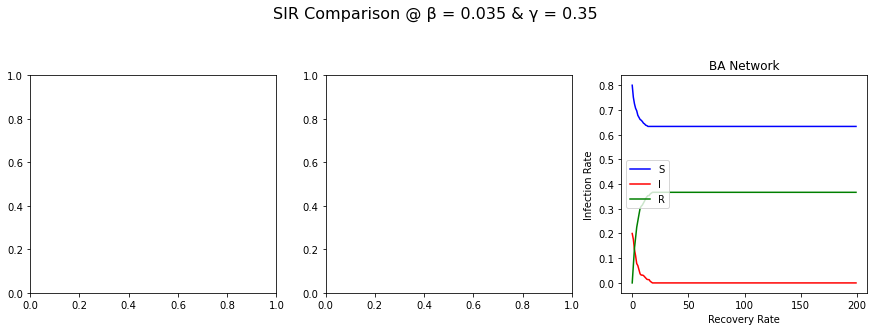

In [53]:
beta = 0.035
gamma=0.350

# Generating Trends for each BA Network for 40% of removal in graph
S_BA,I_BA,R_BA = model_SIR(Original40China, iters=200, beta=beta, gamma=gamma, ini=0.2)

# Making Subplots
fig, ax = plt.subplots(1,3) 
fig.set_size_inches(15,4)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Plotting Recovery Comparison
ax[2].plot(S_BA,'b',label="S")
ax[2].plot(I_BA,'r',label="I")
ax[2].plot(R_BA,'g',label="R")
ax[2].title.set_text("BA Network")
ax[2].legend()

# Main Title
fig.suptitle(f"SIR Comparison @ \u03B2 = {beta} & \u03B3 = {gamma}",size=16, y=1.12)

plt.xlabel('Recovery Rate')
plt.ylabel('Infection Rate')
plt.show()

In [45]:
# Removing 50 % node (LOW TO HIGH)
Original50China = ChinaGraph.copy()
VacDegree= Original50China.degree() 

ChinaNodes=sorted(VacDegree,key=lambda x:x[1],reverse=False)

# Removal of 50% of the nodes with high degree
for i in range(int(0.5*Original50China.number_of_nodes())):
    a= ChinaNodes[i][0]
    for s in Original50China.neighbors(a):
        neighbours_china.add(s)
    removed_chinanodes.add(a)
    Original50China.remove_node(a)

In [46]:
# Model selection
model = ep.SIRModel(Original50China)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.350)
cfg.add_model_parameter('gamma', 0.035)
cfg.add_model_parameter("fraction_infected", 0.2)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(6)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
viz.plot('ChinaGraph50Removal.jpeg')

#View Changes
print(Original50China)


Graph with 500 nodes and 1440 edges


<Figure size 1440x720 with 0 Axes>

C:\Users\mm5248\AppData\Local\Temp/ipykernel_14436/2977188213.py:26: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


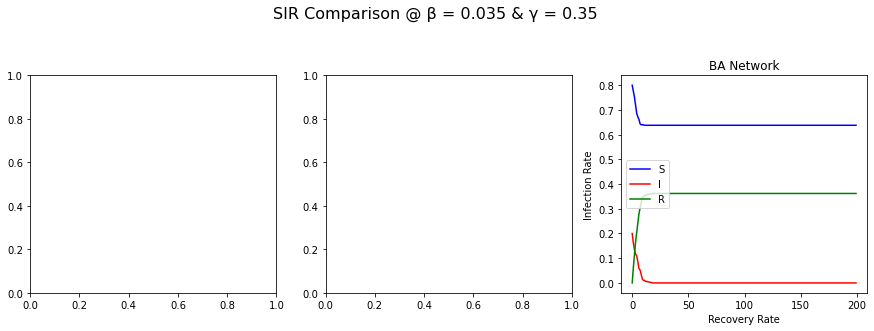

In [54]:
#Display BA GRaph after 50% removal

beta = 0.035
gamma=0.350

# Generating Trends for each BA Network after 50% cut down of nodes
S_BA,I_BA,R_BA = model_SIR(Original50China, iters=200, beta=beta, gamma=gamma, ini=0.2)

# Making Subplots
fig, ax = plt.subplots(1,3) 
fig.set_size_inches(15,4)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Plotting Recovery Comparison
ax[2].plot(S_BA,'b',label="S")
ax[2].plot(I_BA,'r',label="I")
ax[2].plot(R_BA,'g',label="R")
ax[2].title.set_text("BA Network")
ax[2].legend()

# Main Title
fig.suptitle(f"SIR Comparison @ \u03B2 = {beta} & \u03B3 = {gamma}",size=16, y=1.12)

plt.xlabel('Recovery Rate')
plt.ylabel('Infection Rate')
plt.show()